In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score

In [ ]:
dwn_url='https://drive.google.com/uc?id=' + '1eMKmTloIJzbH6Ccw2f8LF5W7E3q5l_Ta'
df = pd.read_csv(dwn_url)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.shape

(1025, 14)

In [ ]:
numeric=[]
for i in df.columns:
    if df[i].dtype=='float64' or df[i].dtype =='int64':
        numeric.append(i)
numeric

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

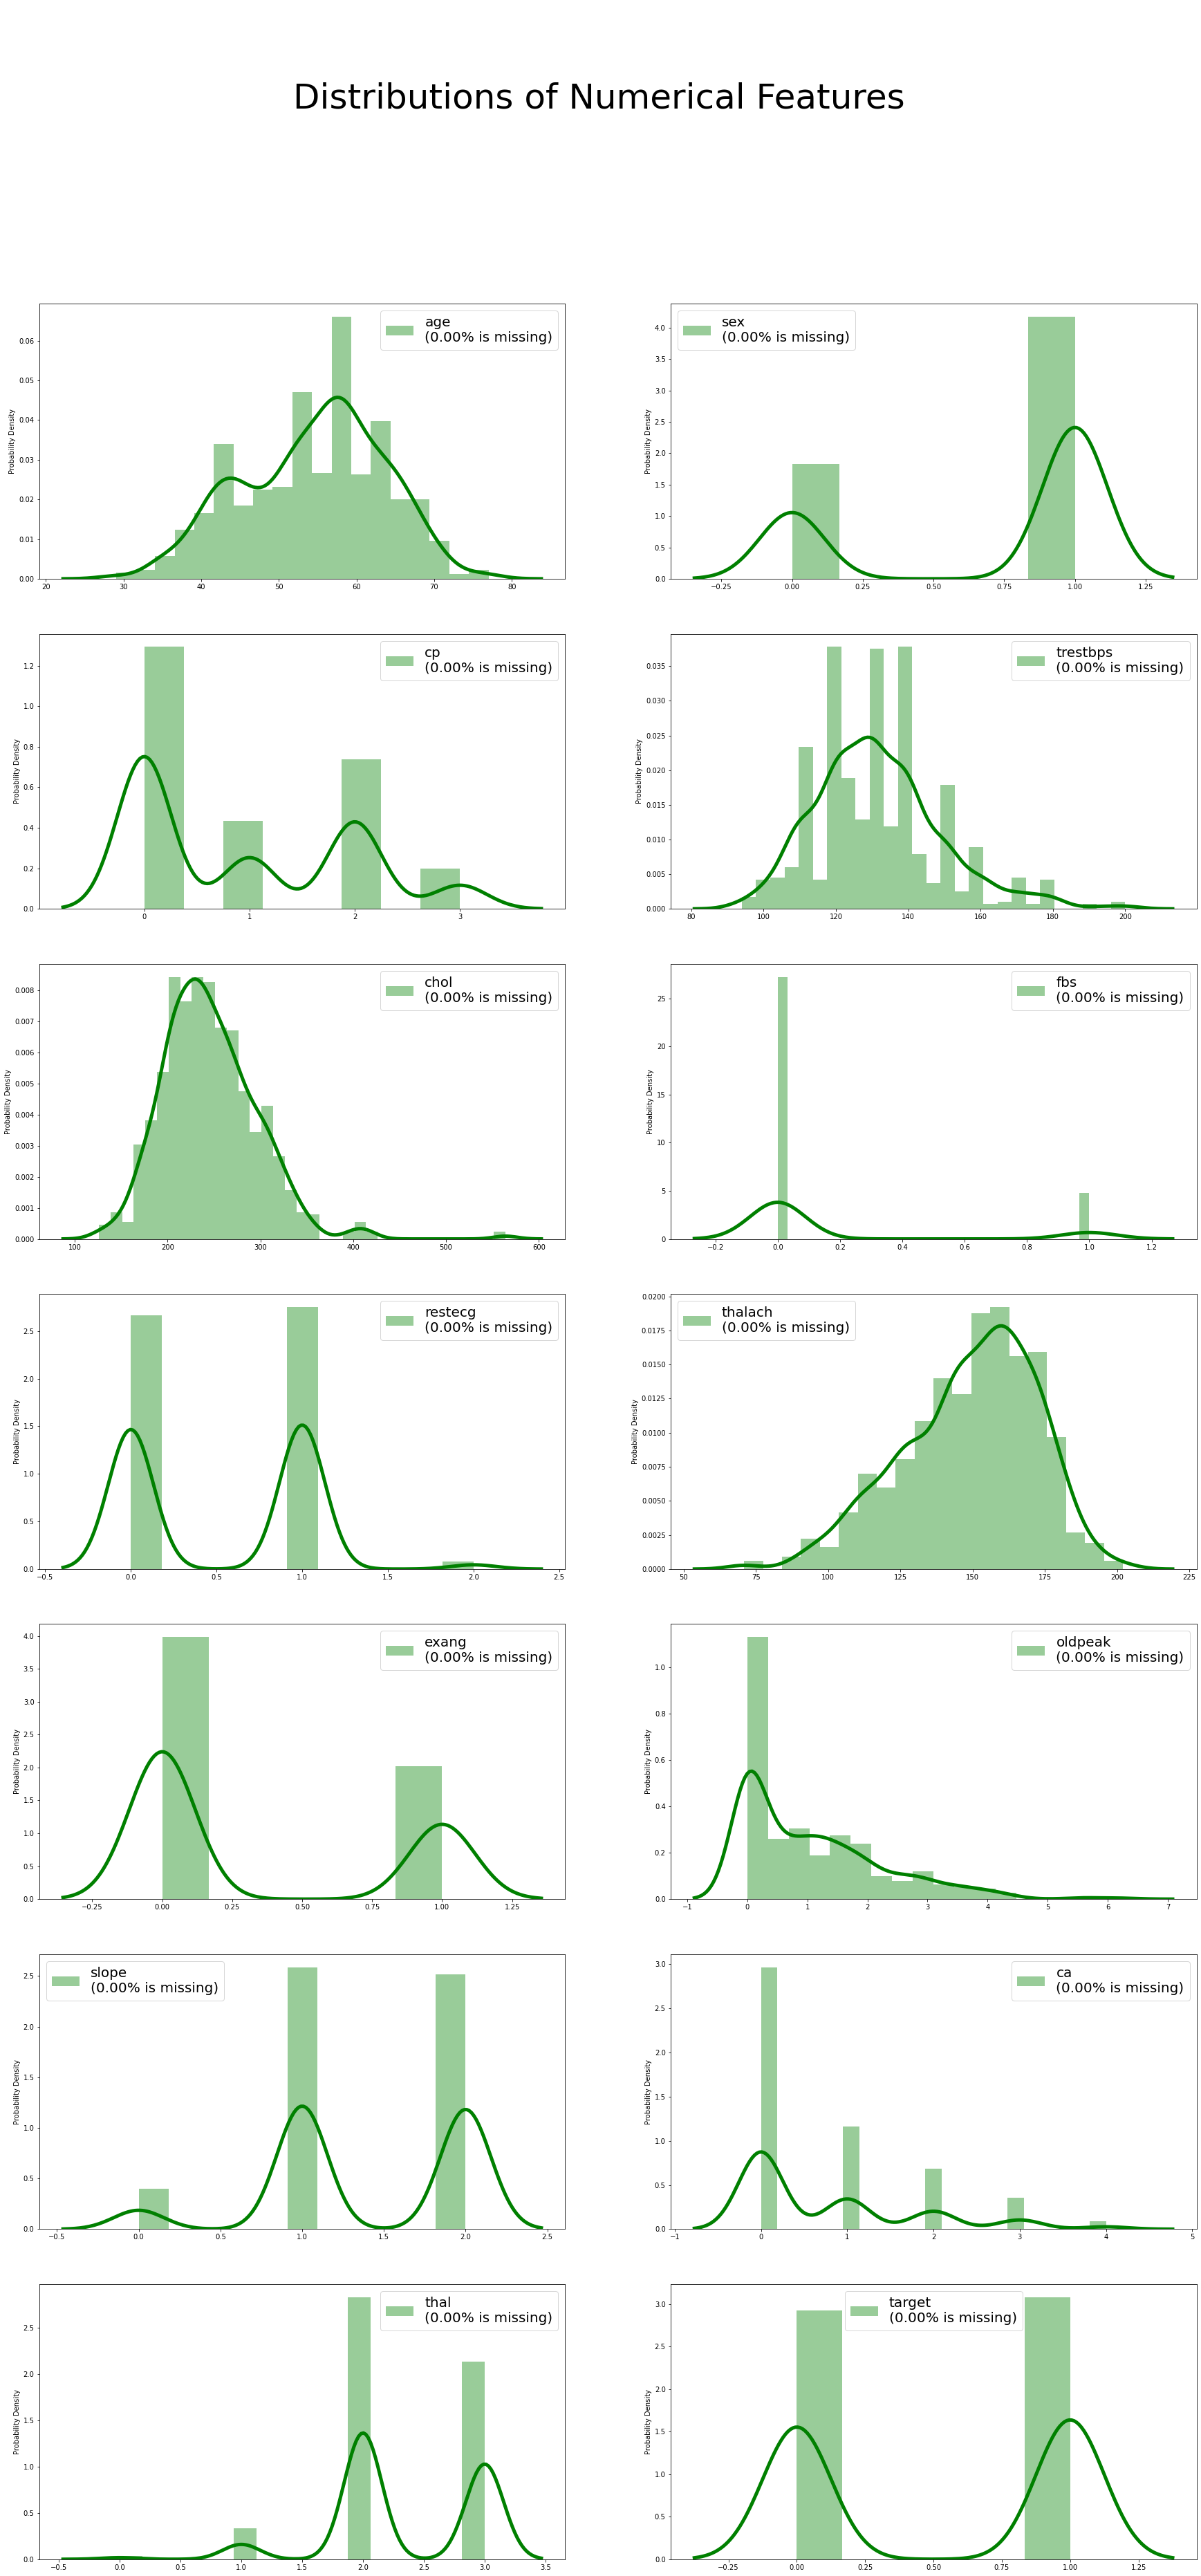

In [ ]:
n_rows, n_cols = (7,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 60))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=50)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    miss_perc="%.2f"%(100*(1-(df[column].dropna().shape[0])/df.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig=sns.distplot(df[column], color="g", label=collabel, norm_hist=True, ax=axes[i,j], kde_kws={"lw":5})
    
    fig=fig.legend(loc='best', fontsize=20)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.savefig("Numerical.jpg")

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

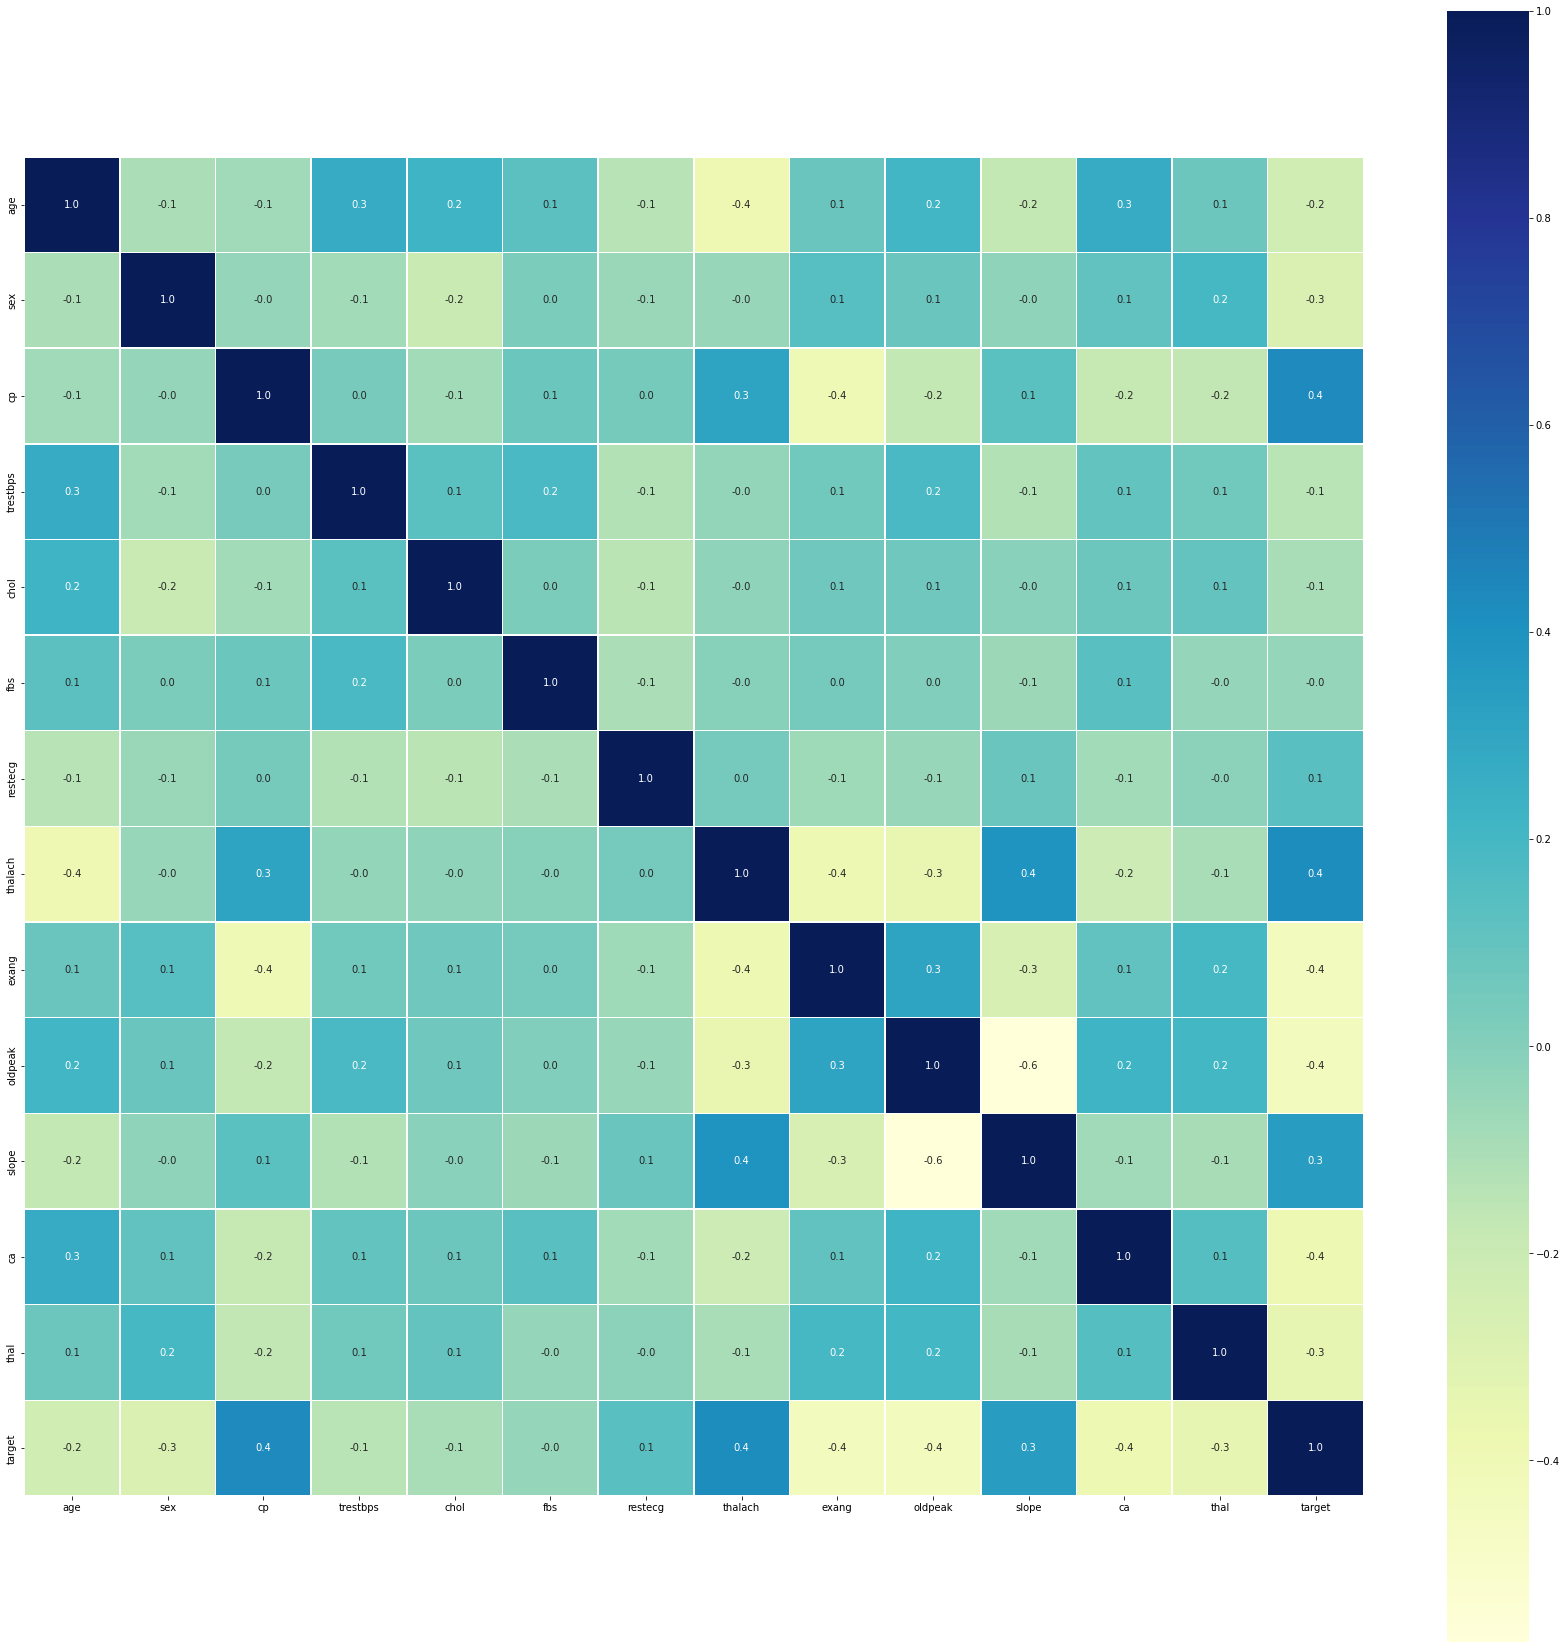

In [ ]:
corr = df.corr()
f,ax=plt.subplots(figsize=(30,30))
sns.heatmap(corr,annot=True,linewidths=0.5,fmt=".1f",ax=ax,cmap="YlGnBu",square=True)
plt.savefig("corr.jpg")

In [ ]:
# mendapatkan nilai absolut dari korelasi
cor_target = abs(corr["target"])

# memilih korelasi dengan menggunakan threshold = 0.1
relevant_features = cor_target[cor_target>0.2]

# mengumpulkan fitur korelasi
corr_features = [index for index, value in relevant_features.iteritems()]

# Drop target variable (target)
corr_features.remove('target')

In [ ]:
corr_features

['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [ ]:
X = df[corr_features]
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) #split the  data into traing and validating

In [ ]:
scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

scaler.transform(X_train) #transform training data
scaler.transform(X_test) #transform validation data

array([[ 0.84237819, -1.55379719, -0.92619093, ...,  0.97708096,
        -0.72837545, -0.53812812],
       [-0.14794181, -1.55379719,  0.98482748, ...,  0.97708096,
        -0.72837545, -3.82185458],
       [ 0.0721293 ,  0.64358464, -0.92619093, ..., -0.65214474,
         0.21772092,  1.10373511],
       ...,
       [ 1.72266262,  0.64358464,  0.98482748, ..., -0.65214474,
         0.21772092,  1.10373511],
       [ 1.39255596,  0.64358464, -0.92619093, ..., -0.65214474,
         1.1638173 , -0.53812812],
       [ 1.0624493 ,  0.64358464,  0.98482748, ...,  0.97708096,
        -0.72837545, -0.53812812]])

In [ ]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):

    model.fit(X_train, y_train)  #fit the model instance 


    predictions = model.predict(X_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = round(accuracy_score(y_test, predictions),2)*100
    f1 = round(f1_score(y_test, predictions),2)*100
    precision = round(precision_score(y_test, predictions),2)*100
    recall = round(recall_score(y_test, predictions),2)*100

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall]], columns=['accuracy', 'f1_score', 'precision', 'recall'])
    return eval_df

In [ ]:
from sklearn.model_selection import GridSearchCV
def train_evaluate_model_tuning(model, X_train, y_train, X_test,y_test):

    param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
    grid = GridSearchCV(model, param_grid, refit = True, verbose = 3)
    
    grid.fit(X_train, y_train)  #fit the model instance 


    predictions = grid.predict(X_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = round(accuracy_score(y_test, predictions),2)*100
    f1 = round(f1_score(y_test, predictions),2)*100
    precision = round(precision_score(y_test, predictions),2)*100
    recall = round(recall_score(y_test, predictions),2)*100

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall]], columns=['accuracy', 'f1_score', 'precision', 'recall'])
    return eval_df

In [ ]:
svc =  SVC()
results = train_evaluate_model(svc, X_train, y_train, X_test, y_test)
results.index = ['SVM']

svc_tuning=  SVC()
SVC = train_evaluate_model_tuning(svc_tuning, X_train, y_train, X_test, y_test)
SVC.index = ['SVM_Hyperparameter_Tuning']
results = results.append(SVC)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.528 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.528 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.549 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.566 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.566 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.694 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
results

,accuracy,f1_score,precision,recall
SVM,69.0,69.0,66.0,73.0
SVM_Hyperparameter_Tuning,96.0,96.0,100.0,92.0
